### Automating Crypto Website Pull with API
- Source: https://www.youtube.com/watch?v=PSNXoAs2FtQ (Data Analyst Bootcamp - Alex the Analyst)
- Edited / Modified by: Edy Blau
- Date: 09/11/2024

In [14]:
import pandas as pd
import os

In [15]:
# This uses mock data with a generic API key
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'b54bcf4d-1bca-4e8e-9a24-22ff2c3d462c',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-09-11T21:29:53.892Z', 'error_code': 0, 'error_message': None, 'elapsed': 1, 'credit_count': 1, 'notice': None, 'version': 'V2.0.1'}, 'data': [{'id': 3312, 'name': '8qgpuosp5xc', 'symbol': '82b7f6ase3n', 'slug': '2phsbpv1pi4', 'cmc_rank': 21, 'num_market_pairs': 8999, 'circulating_supply': 9522, 'total_supply': 7984, 'max_supply': 1066, 'infinite_supply': None, 'last_updated': '2024-09-11T21:29:53.892Z', 'date_added': '2024-09-11T21:29:53.892Z', 'tags': ['tpm8w7688ie', 'vxl1m3v7dhf', 'fvsdne2bknn', 'czy2km8wesi', 'ckx5c7q6tw4', 'om8mz3ks70h', 'lzdlgmyau8n', 'isbf4uufc4j', 'fyvvlvw0tvd', 'xrgav55dku'], 'platform': None, 'self_reported_circulating_supply': None, 'self_reported_market_cap': None, 'quote': {'USD': {'price': 0.8954571954178112, 'volume_24h': 7897, 'volume_change_24h': 0.8575023359586931, 'percent_change_1h': 0.8779888085132037, 'percent_change_24h': 0.14485491734320743, 'percent_change_7d': 0.7957863874874187, 'market_cap': 0.02791594412808651,

In [16]:
type(data)

dict

In [17]:
import pandas as pd

# This normalizes the data and convert them to a dataframe
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

c:\Users\edwra\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,cmc_rank,num_market_pairs,circulating_supply,total_supply,max_supply,infinite_supply,...,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,timestamp
0,3312,8qgpuosp5xc,82b7f6ase3n,2phsbpv1pi4,21,8999,9522,7984,1066,None,...,7897,0.857502,0.877989,0.144855,0.795786,0.027916,1941,0.680503,2024-09-11T21:29:53.892Z,2024-09-11 21:29:57.881882
1,8901,r4gmt08jo9o,z0twynya6ad,2oftegiurfk,9690,6263,2522,6618,7108,None,...,9558,0.952020,0.273836,0.231033,0.286355,0.025617,1888,0.645377,2024-09-11T21:29:53.892Z,2024-09-11 21:29:57.881882
2,2974,59zgxyhw7y7,2vu1h4bvakd,4ijzmi0cx7i,6883,242,8473,543,1728,None,...,5342,0.491257,0.312207,0.739015,0.493419,0.151690,5130,0.088549,2024-09-11T21:29:53.892Z,2024-09-11 21:29:57.881882
3,66,ywyxynlj4ya,q2gm0xv0e8,rgn10vtq19p,7189,7233,8073,457,4268,None,...,6765,0.760443,0.864141,0.043584,0.578799,0.332570,8886,0.499222,2024-09-11T21:29:53.892Z,2024-09-11 21:29:57.881882
4,3390,dc2z4m9s4v7,219mpa2uwms,bh6kd0b06bt,2119,5365,5547,2138,304,None,...,7924,0.794134,0.322493,0.956752,0.714345,0.842157,8164,0.292128,2024-09-11T21:29:53.892Z,2024-09-11 21:29:57.881882
5,2984,t7m85vifj3,dtbxqn9t8im,69qk9nojdwj,6861,5807,5862,645,5119,None,...,9111,0.090025,0.628570,0.418687,0.182822,0.807920,5985,0.000165,2024-09-11T21:29:53.892Z,2024-09-11 21:29:57.881882
6,1071,of5kordsheo,pvf7vyx85y,4o9mt33fhmr,5080,8582,7446,6578,8591,None,...,5346,0.548527,0.511200,0.755971,0.830541,0.970675,5940,0.174510,2024-09-11T21:29:53.892Z,2024-09-11 21:29:57.881882
7,824,mrat0k2ot5,ln3th5v1ja,rujmuimlpk,1513,1663,1955,769,1300,None,...,3111,0.584858,0.263382,0.852129,0.350706,0.139879,717,0.357849,2024-09-11T21:29:53.892Z,2024-09-11 21:29:57.881882
8,5707,qn4s5an85e9,8zb074uouoq,536iagoedho,8380,6868,939,456,8636,None,...,6106,0.308276,0.571037,0.044577,0.228142,0.476255,5325,0.383692,2024-09-11T21:29:53.892Z,2024-09-11 21:29:57.881882
9,6987,kcogag5gfv,v2cxxq0ipkr,bzlgw9jznce,4149,1397,1957,7577,3366,None,...,4550,0.504288,0.978322,0.866505,0.358812,0.700471,860,0.841039,2024-09-11T21:29:53.892Z,2024-09-11 21:29:57.881882


In [18]:
def api_runner():
  global df
    # This uses mock data with a generic API key
  from requests import Request, Session
  from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
  import json

  url = 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
  parameters = {
    'start':'1',
    'limit':'5000',
    'convert':'USD'
  }
  headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': 'b54bcf4d-1bca-4e8e-9a24-22ff2c3d462c',
  }

  session = Session()
  session.headers.update(headers)

  try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    print(data)
  except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

  df2 = pd.json_normalize(data['data'])
  df2['timestamp'] = pd.to_datetime('now')
  df = df.append(df2)

  if not os.path.isfile(r"C:\Users\...\Crypto_API.csv"):
    df.to_csv(r"C:\Users\...\Crypto_API.csv", header='column_names')
  else:
    df.to_csv(r"C:\Users\...\Crypto_API.csv", mode='a', header=False)

In [19]:
for i in range(2):
    api_runner()
    print("API runner completed")

{'status': {'timestamp': '2024-09-11T21:29:53.892Z', 'error_code': 0, 'error_message': None, 'elapsed': 1, 'credit_count': 1, 'notice': None, 'version': 'V2.0.1'}, 'data': [{'id': 3312, 'name': '8qgpuosp5xc', 'symbol': '82b7f6ase3n', 'slug': '2phsbpv1pi4', 'cmc_rank': 21, 'num_market_pairs': 8999, 'circulating_supply': 9522, 'total_supply': 7984, 'max_supply': 1066, 'infinite_supply': None, 'last_updated': '2024-09-11T21:29:53.892Z', 'date_added': '2024-09-11T21:29:53.892Z', 'tags': ['tpm8w7688ie', 'vxl1m3v7dhf', 'fvsdne2bknn', 'czy2km8wesi', 'ckx5c7q6tw4', 'om8mz3ks70h', 'lzdlgmyau8n', 'isbf4uufc4j', 'fyvvlvw0tvd', 'xrgav55dku'], 'platform': None, 'self_reported_circulating_supply': None, 'self_reported_market_cap': None, 'quote': {'USD': {'price': 0.8954571954178112, 'volume_24h': 7897, 'volume_change_24h': 0.8575023359586931, 'percent_change_1h': 0.8779888085132037, 'percent_change_24h': 0.14485491734320743, 'percent_change_7d': 0.7957863874874187, 'market_cap': 0.02791594412808651,

c:\Users\edwra\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\edwra\AppData\Local\Temp\ipykernel_2176\3773562066.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API runner completed


c:\Users\edwra\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\edwra\AppData\Local\Temp\ipykernel_2176\3773562066.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


In [20]:
df

,id,name,symbol,slug,cmc_rank,num_market_pairs,circulating_supply,total_supply,max_supply,infinite_supply,...,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,timestamp
0,3312,8qgpuosp5xc,82b7f6ase3n,2phsbpv1pi4,21,8999,9522,7984,1066,None,...,7897,0.857502,0.877989,0.144855,0.795786,0.027916,1941,0.680503,2024-09-11T21:29:53.892Z,2024-09-11 21:29:57.881882
1,8901,r4gmt08jo9o,z0twynya6ad,2oftegiurfk,9690,6263,2522,6618,7108,None,...,9558,0.952020,0.273836,0.231033,0.286355,0.025617,1888,0.645377,2024-09-11T21:29:53.892Z,2024-09-11 21:29:57.881882
2,2974,59zgxyhw7y7,2vu1h4bvakd,4ijzmi0cx7i,6883,242,8473,543,1728,None,...,5342,0.491257,0.312207,0.739015,0.493419,0.151690,5130,0.088549,2024-09-11T21:29:53.892Z,2024-09-11 21:29:57.881882
3,66,ywyxynlj4ya,q2gm0xv0e8,rgn10vtq19p,7189,7233,8073,457,4268,None,...,6765,0.760443,0.864141,0.043584,0.578799,0.332570,8886,0.499222,2024-09-11T21:29:53.892Z,2024-09-11 21:29:57.881882
4,3390,dc2z4m9s4v7,219mpa2uwms,bh6kd0b06bt,2119,5365,5547,2138,304,None,...,7924,0.794134,0.322493,0.956752,0.714345,0.842157,8164,0.292128,2024-09-11T21:29:53.892Z,2024-09-11 21:29:57.881882
5,2984,t7m85vifj3,dtbxqn9t8im,69qk9nojdwj,6861,5807,5862,645,5119,None,...,9111,0.090025,0.628570,0.418687,0.182822,0.807920,5985,0.000165,2024-09-11T21:29:53.892Z,2024-09-11 21:29:57.881882
6,1071,of5kordsheo,pvf7vyx85y,4o9mt33fhmr,5080,8582,7446,6578,8591,None,...,5346,0.548527,0.511200,0.755971,0.830541,0.970675,5940,0.174510,2024-09-11T21:29:53.892Z,2024-09-11 21:29:57.881882
7,824,mrat0k2ot5,ln3th5v1ja,rujmuimlpk,1513,1663,1955,769,1300,None,...,3111,0.584858,0.263382,0.852129,0.350706,0.139879,717,0.357849,2024-09-11T21:29:53.892Z,2024-09-11 21:29:57.881882
8,5707,qn4s5an85e9,8zb074uouoq,536iagoedho,8380,6868,939,456,8636,None,...,6106,0.308276,0.571037,0.044577,0.228142,0.476255,5325,0.383692,2024-09-11T21:29:53.892Z,2024-09-11 21:29:57.881882
9,6987,kcogag5gfv,v2cxxq0ipkr,bzlgw9jznce,4149,1397,1957,7577,3366,None,...,4550,0.504288,0.978322,0.866505,0.358812,0.700471,860,0.841039,2024-09-11T21:29:53.892Z,2024-09-11 21:29:57.881882


In [26]:
dfR = pd.read_csv(r"C:\Users\...\Crypto_API.csv")
dfR

,Unnamed: 0,id,name,symbol,slug,cmc_rank,num_market_pairs,circulating_supply,total_supply,max_supply,...,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,timestamp
0,0,3312,8qgpuosp5xc,82b7f6ase3n,2phsbpv1pi4,21,8999,9522,7984,1066,...,7897,0.857502,0.877989,0.144855,0.795786,0.027916,1941,0.680503,2024-09-11T21:29:53.892Z,2024-09-11 21:29:57.881882
1,1,8901,r4gmt08jo9o,z0twynya6ad,2oftegiurfk,9690,6263,2522,6618,7108,...,9558,0.952020,0.273836,0.231033,0.286355,0.025617,1888,0.645377,2024-09-11T21:29:53.892Z,2024-09-11 21:29:57.881882
2,2,2974,59zgxyhw7y7,2vu1h4bvakd,4ijzmi0cx7i,6883,242,8473,543,1728,...,5342,0.491257,0.312207,0.739015,0.493419,0.151690,5130,0.088549,2024-09-11T21:29:53.892Z,2024-09-11 21:29:57.881882
3,3,66,ywyxynlj4ya,q2gm0xv0e8,rgn10vtq19p,7189,7233,8073,457,4268,...,6765,0.760443,0.864141,0.043584,0.578799,0.332570,8886,0.499222,2024-09-11T21:29:53.892Z,2024-09-11 21:29:57.881882
4,4,3390,dc2z4m9s4v7,219mpa2uwms,bh6kd0b06bt,2119,5365,5547,2138,304,...,7924,0.794134,0.322493,0.956752,0.714345,0.842157,8164,0.292128,2024-09-11T21:29:53.892Z,2024-09-11 21:29:57.881882
5,5,2984,t7m85vifj3,dtbxqn9t8im,69qk9nojdwj,6861,5807,5862,645,5119,...,9111,0.090025,0.628570,0.418687,0.182822,0.807920,5985,0.000165,2024-09-11T21:29:53.892Z,2024-09-11 21:29:57.881882
6,6,1071,of5kordsheo,pvf7vyx85y,4o9mt33fhmr,5080,8582,7446,6578,8591,...,5346,0.548527,0.511200,0.755971,0.830541,0.970675,5940,0.174510,2024-09-11T21:29:53.892Z,2024-09-11 21:29:57.881882
7,7,824,mrat0k2ot5,ln3th5v1ja,rujmuimlpk,1513,1663,1955,769,1300,...,3111,0.584858,0.263382,0.852129,0.350706,0.139879,717,0.357849,2024-09-11T21:29:53.892Z,2024-09-11 21:29:57.881882
8,8,5707,qn4s5an85e9,8zb074uouoq,536iagoedho,8380,6868,939,456,8636,...,6106,0.308276,0.571037,0.044577,0.228142,0.476255,5325,0.383692,2024-09-11T21:29:53.892Z,2024-09-11 21:29:57.881882
9,9,6987,kcogag5gfv,v2cxxq0ipkr,bzlgw9jznce,4149,1397,1957,7577,3366,...,4550,0.504288,0.978322,0.866505,0.358812,0.700471,860,0.841039,2024-09-11T21:29:53.892Z,2024-09-11 21:29:57.881882


In [27]:
dfR = dfR.groupby("name", sort=False)[["quote.USD.percent_change_1h",	"quote.USD.percent_change_24h",	"quote.USD.percent_change_7d"]].mean()
dfR

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d
name,,,
8qgpuosp5xc,0.877989,0.144855,0.795786
r4gmt08jo9o,0.273836,0.231033,0.286355
59zgxyhw7y7,0.312207,0.739015,0.493419
ywyxynlj4ya,0.864141,0.043584,0.578799
dc2z4m9s4v7,0.322493,0.956752,0.714345
t7m85vifj3,0.628570,0.418687,0.182822
of5kordsheo,0.511200,0.755971,0.830541
mrat0k2ot5,0.263382,0.852129,0.350706
qn4s5an85e9,0.571037,0.044577,0.228142


In [29]:
dfR.reset_index(inplace=True)

In [30]:
dfR["name"] = ["Crypto Coin " + str(i+1) for i in range(len(dfR))]
dfR

,name,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d
0,Crypto Coin 1,0.877989,0.144855,0.795786
1,Crypto Coin 2,0.273836,0.231033,0.286355
2,Crypto Coin 3,0.312207,0.739015,0.493419
3,Crypto Coin 4,0.864141,0.043584,0.578799
4,Crypto Coin 5,0.322493,0.956752,0.714345
5,Crypto Coin 6,0.628570,0.418687,0.182822
6,Crypto Coin 7,0.511200,0.755971,0.830541
7,Crypto Coin 8,0.263382,0.852129,0.350706
8,Crypto Coin 9,0.571037,0.044577,0.228142
9,Crypto Coin 10,0.978322,0.866505,0.358812


In [34]:
dfR.set_index("name", inplace=True)

In [35]:
dfR

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d
name,,,
Crypto Coin 1,0.877989,0.144855,0.795786
Crypto Coin 2,0.273836,0.231033,0.286355
Crypto Coin 3,0.312207,0.739015,0.493419
Crypto Coin 4,0.864141,0.043584,0.578799
Crypto Coin 5,0.322493,0.956752,0.714345
Crypto Coin 6,0.628570,0.418687,0.182822
Crypto Coin 7,0.511200,0.755971,0.830541
Crypto Coin 8,0.263382,0.852129,0.350706
Crypto Coin 9,0.571037,0.044577,0.228142


In [36]:
dfR.rename(columns={
        "quote.USD.percent_change_1h" : "Percent-Change-1h",
        "quote.USD.percent_change_24h" : "Percent-Change-24h",
        "quote.USD.percent_change_7d" : "Percent-Change-7d",
    }, inplace=True)

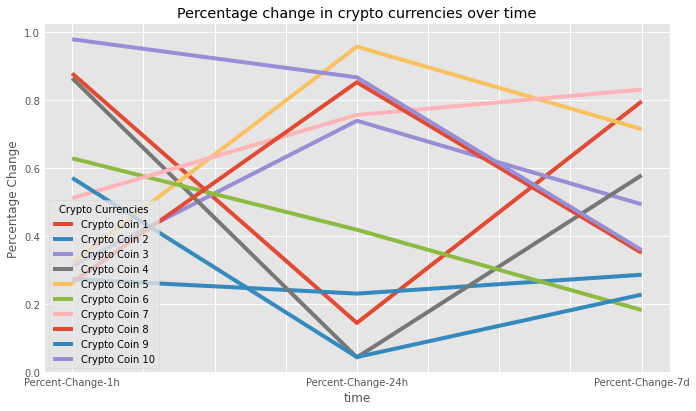

In [48]:
# Plot the data.
# To use a line plot, we must first transpose the df.
import matplotlib.pyplot as plt
import matplotlib.style as style

# Aplicar un estilo predefinido
style.use('ggplot')

dfR.T.plot(kind='line', figsize=(10,6))
plt.title("Percentage change in crypto currencies over time")
plt.xlabel("time")
plt.ylabel("Percentage Change")
plt.legend(title="Crypto Currencies", loc='lower left')
plt.grid(True)
plt.show()